# Gotland Basin

This notebook plots the vertical profiles of the simulated temperature at selected times when observations are available in the [Gotland deep](https://gotm.net/cases/gotland_deep/) test case.

In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *

## Load data

First, store the information of the four simulations into lists and dictionaries.

In [2]:
casenames = [
    'GLS-C01A',
    'KPP-CVMix',
    'KPPLT-VR12',
    'KPPLT-LF17',
    ]

colors = {
    'GLS-C01A': 'tab:blue',
    'KPP-CVMix': 'tab:olive',
    'KPPLT-VR12': 'tab:orange',
    'KPPLT-LF17': 'tab:red',
    }

casedir = '../gotm/run/Gotland_wave'
save_fig = True

Load data into a dictionary.

In [3]:
sims = {}
dataset = {}
for case in casenames:
    sim = Simulation(path=casedir+'/'+case)
    sims[case] = sim
    dataset[case] = sim.load_data()

Get the time when observation is available.

In [4]:
# get the time when observation is available
with open('gotland_obs_time.txt', 'r') as file:
    time_str = file.read().replace('/','-')
obs_time_str_list = time_str.split('\n')[:-1]
obs_time_list = [np.datetime64(ts) for ts in obs_time_str_list]

In [5]:
data    = dataset['KPP-CVMix']
time    = data.time
time_start = time[0]
time_end = time[-1]
pfllist = []
for t in obs_time_list:
    if t > time_start and t < time_end:
        pfllist.append(t)

# Figure 1

Plot the vertical profiles of temperature and salinity when observations are available.

In [6]:
data    = dataset['KPP-CVMix']
tpfl_obs =  data.temp_obs[:,:,0,0]
spfl_obs =  data.salt_obs[:,:,0,0]
for i, t in enumerate(pfllist):
    fig, axarr = plt.subplots(1,2, sharey='row')
    tpfl_obs.sel(time=t, method='nearest').plot(y='z', ax=axarr[0], color='k',
                  linewidth=1.5)
    spfl_obs.sel(time=t, method='nearest').plot(y='z', ax=axarr[1], color='k',
                  linewidth=1.5, label='Obs')
    for case in casenames:
        data = dataset[case]
        tpfl = dataset[case].temp[:,:,0,0].sel(time=t, method='nearest')
        tpfl.plot(y='z', ax=axarr[0], color=colors[case],
                  linewidth=1.5, alpha=0.8)
        spfl = dataset[case].salt[:,:,0,0].sel(time=t, method='nearest')
        spfl.plot(y='z', ax=axarr[1], color=colors[case],
                  linewidth=1.5, alpha=0.8, label=case)
    axarr[1].legend(loc='lower left')
    axarr[1].set_title('')
    axarr[1].set_ylabel('')
    if save_fig:
        figname = './gotland_wave_pfls/gotland_wave_pfl_{}.pdf'.format(
            str(pfllist[i]).replace(':',''))
        fig.savefig(figname, dpi=300)  
        plt.close(fig)
    

Show the time when observations are available.

In [7]:
for i, t in enumerate(pfllist):
    print('{}: {}'.format(i, str(t)))

0: 1997-02-15T06:01:15
1: 1997-02-15T09:31:29
2: 1997-02-15T10:42:01
3: 1997-02-15T11:15:34
4: 1997-03-29T15:09:01
5: 1997-05-08T18:15:09
6: 1997-08-09T04:59:40
7: 1997-08-09T06:43:12
8: 1997-11-03T07:31:29
9: 1997-11-03T08:52:19
10: 1998-02-17T20:49:53
11: 1998-02-18T07:09:36
12: 1998-03-27T01:20:14
13: 1998-05-12T07:42:21
14: 1998-05-16T06:50:04
15: 1998-05-17T02:55:33
16: 1998-05-18T02:55:25
17: 1998-05-19T02:51:45
18: 1998-08-08T12:00:26
19: 1998-11-07T04:22:58
20: 1998-11-13T07:15:45
21: 1999-02-15T15:39:57
22: 1999-02-16T17:09:04
23: 1999-03-25T21:34:28
24: 1999-03-26T07:21:38
25: 1999-03-26T12:07:11
26: 1999-03-26T15:06:15
27: 1999-05-14T04:13:21
28: 1999-08-07T13:38:37
29: 1999-12-03T07:14:58
30: 1999-12-05T13:31:05
31: 1999-12-05T17:33:07
32: 2000-02-13T09:03:28
33: 2000-02-13T10:56:46
34: 2000-05-12T03:13:36
35: 2000-05-12T06:13:53
36: 2000-08-01T13:25:38
37: 2000-08-03T22:31:56
38: 2000-11-02T07:17:29
39: 2000-11-02T17:30:39
40: 2000-11-03T07:07:53
41: 2000-11-03T08:42:55
42

## Figure 2

A comparison of the temperature profiles at Gotland between the observation (black) and GOTM simulations (colored) at selected times.

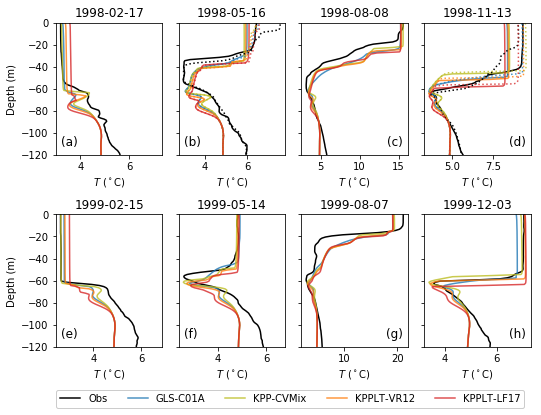

In [8]:
tidxlist1 = [10, 14, 18, 20]
tidxlist1_aux = [-1, 16, -1, 19]
tidxlist2 = [21, 27, 28, 29]
tidxlist2_aux = [-1, -1 , -1, -1]
fig, axarr = plt.subplots(2, 4, sharey='row')
fig.set_size_inches([8,6])

data    = dataset['KPP-CVMix']
tpfl_obs =  data.temp_obs[:,:,0,0]
spfl_obs =  data.salt_obs[:,:,0,0]
for i in np.arange(4):
    t = pfllist[tidxlist1[i]]
    tpfl_obs.sel(time=t, method='nearest').plot(y='z', ax=axarr[0,i], color='k',
                  linewidth=1.5)
    for case in casenames:
        data = dataset[case]
        tpfl = dataset[case].temp[:,:,0,0].sel(time=t, method='nearest')
        tpfl.plot(y='z', ax=axarr[0,i], color=colors[case],
                  linewidth=1.5, alpha=0.8)
    if tidxlist1_aux[i] > 0:
        t = pfllist[tidxlist1_aux[i]]
        tpfl_obs.sel(time=t, method='nearest').plot(y='z', ax=axarr[0,i], color='k',
                      linewidth=1.5, linestyle=':')
        for case in casenames:
            data = dataset[case]
            tpfl = dataset[case].temp[:,:,0,0].sel(time=t, method='nearest')
            tpfl.plot(y='z', ax=axarr[0,i], color=colors[case],
                      linewidth=1.5, linestyle=':', alpha=0.8)
        
    t = pfllist[tidxlist2[i]]
    tpfl_obs.sel(time=t, method='nearest').plot(y='z', ax=axarr[1,i], color='k',
                  linewidth=1.5, label='Obs')
    for case in casenames:
        data = dataset[case]
        tpfl = dataset[case].temp[:,:,0,0].sel(time=t, method='nearest')
        tpfl.plot(y='z', ax=axarr[1,i], color=colors[case],
                  linewidth=1.5, alpha=0.8, label=case)

    if tidxlist2_aux[i] > 0:
        t = pfllist[tidxlist2_aux[i]]
        tpfl_obs.sel(time=t, method='nearest').plot(y='z', ax=axarr[1,i], color='k',
                      linewidth=1.5, linestyle=':')
        for case in casenames:
            data = dataset[case]
            tpfl = dataset[case].temp[:,:,0,0].sel(time=t, method='nearest')
            tpfl.plot(y='z', ax=axarr[1,i], color=colors[case],
                      linewidth=1.5, linestyle=':', alpha=0.8)

axarr[1,0].legend(loc = 'lower left', fontsize=10, ncol=5,
                  bbox_to_anchor=(-0.04, -0.5), framealpha=1)
    
for i in np.arange(2):
    for j in np.arange(4):
        k = i*4+j
        ax = axarr[i,j]
        ax.set_title('')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim([-120,0])
        if j < 2:
            ax.text(0.05, 0.05, '('+string.ascii_lowercase[k]+')',
                    transform=ax.transAxes, fontsize=12, va='bottom', ha='left')
        else:
            ax.text(0.95, 0.05, '('+string.ascii_lowercase[k]+')',
                    transform=ax.transAxes, fontsize=12, va='bottom', ha='right')
    axarr[i,0].set_ylabel('Depth (m)')
    
for j in np.arange(4):
    axarr[0,j].set_title(str(pfllist[tidxlist1[j]])[:10])
    axarr[0,j].set_xlabel('$T$ ($^\circ$C)')
    axarr[1,j].set_title(str(pfllist[tidxlist2[j]])[:10])
    axarr[1,j].set_xlabel('$T$ ($^\circ$C)')
#     axarr[1,j].set_xlim([6.5,11])
    
if save_fig:
    plt.subplots_adjust(top=0.93, bottom=0.18, right=0.95, hspace=0.45, wspace=0.15)
    figname = 'gotland_wave_pfl.pdf'
    fig.savefig(figname, dpi=300)